<a href="https://colab.research.google.com/github/zbaraskaya/-/blob/main/%D1%83%D0%B4%D0%B0%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D0%BE%D0%B2%20z-valey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прогнозирование конечных свойств новых материалов
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.


# Проверка выбросов методом Z-VALUE

In [ ]:
# библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
x_bp = pd.read_excel('/content/X_bp.xlsx')


In [ ]:
x_nup = pd.read_excel('/content/X_nup.xlsx')


Объединение делать по индексу тип объединения INNER


In [ ]:
x_nup = x_nup.iloc[0:1023, :]


In [ ]:
df = x_nup.merge(x_bp, how='left', left_on ='Unnamed: 0', right_on ='Unnamed: 0')
df = df.iloc[:, 1:]
df.head(5)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,4.0,57.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,0.0,4.0,60.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,0.0,4.0,70.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,0.0,5.0,47.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,0.0,5.0,57.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


#Проверим наличие выбросов методом Z-VALUE
При наличии выбросов удалим их, очистив данные и подготовив их к дальнейшему исследованию

In [ ]:
# положим названия столбцов в отдельный список
names = df.columns
names

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

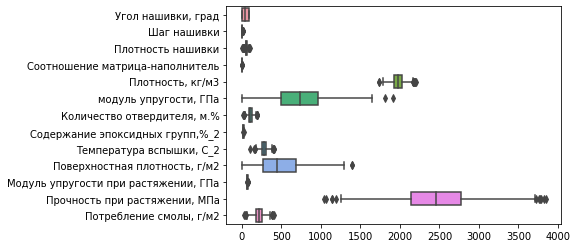

In [ ]:
def box_plt13(df):
  sns.boxplot(data = df, orient="h")
  plt.show()
box_plt13(df)

#Угол нашивки, град

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


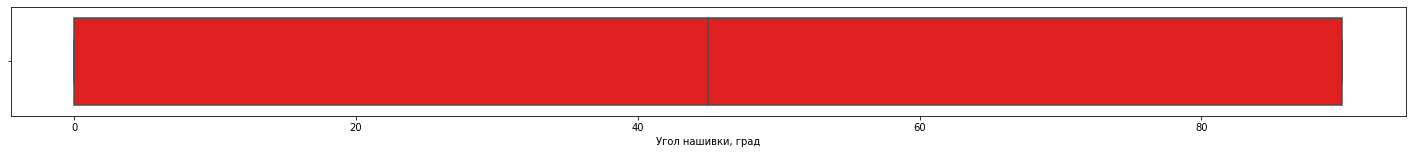

In [ ]:
# в данной переменной выбросов нет
plt.figure(figsize=(25,2))
sns.boxplot(df[names[0]],fliersize=10, color='red')

#Шаг нашивки

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


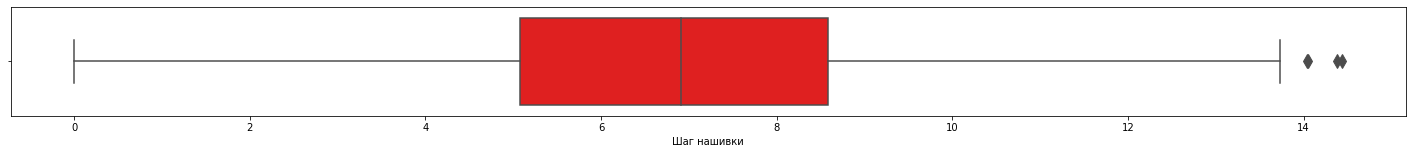

In [ ]:
#в данной переменной есть выбросы, необходимо их проверить
plt.figure(figsize=(25,2))
sns.boxplot(df[names[1]],fliersize=10, color='red')

In [ ]:
#поиск отклонений через z-value
mm1 = df[names[1]].mean() #среднее значение 
st1 = statistics.stdev(df[names[1]]) # cтандартное отклонение = корень кв из дисперсии

for i in range(0,len(df)):
  df.loc[i, 'Шаг нашивки'] = (df.loc[i, names[1]] - mm1) / st1 

print('max value = ', df['Шаг нашивки'].max(), 'min value = ', df['Шаг нашивки'].min())
print('Выбросов не обнаружено') #выбросы находятся в пределех от -3 до 3 , согласно нормальному распределению

max value =  2.941836030444919 min value =  -2.691363642150476
Выбросов не обнаружено


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


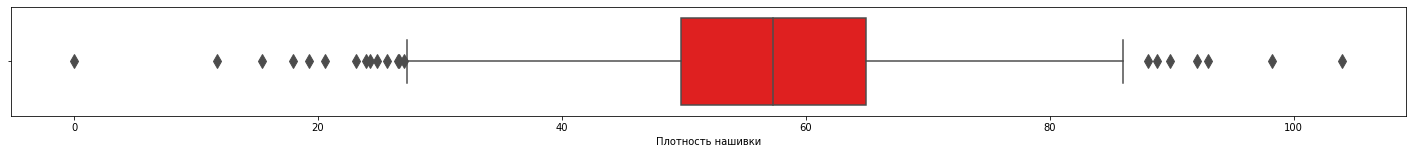

In [ ]:
# следуетс проверить на выбросы
plt.figure(figsize=(25,2))
sns.boxplot(df[names[2]],fliersize=10, color='red')

In [ ]:
#поиск отклонений через z-value
mm2 = df[names[2]].mean() #среднее значение 
st2 = statistics.stdev(df[names[2]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(df)):
  df.loc[i, 'Плотность нашивки'] = (df.loc[i, names[2]] - mm2) / st2 

print('max value = ', df['Плотность нашивки'].max(), 'min value = ', df['Плотность нашивки'].min())
print('Выбросы обнаружены') #выбросы находятся в пределех от -3 до 3 , согласно нормальному распределению необходимо почистить выбросы

max value =  3.7920079495100456 min value =  -4.627485532883755
Выбросы обнаружены


In [ ]:
dfg = df[(df['Плотность нашивки'] <= 3.0) & (df['Плотность нашивки']>= -3.0)]
dfg.reset_index(inplace = True)
dfg = dfg.copy()

#Соотношение матрица-наполнитель

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


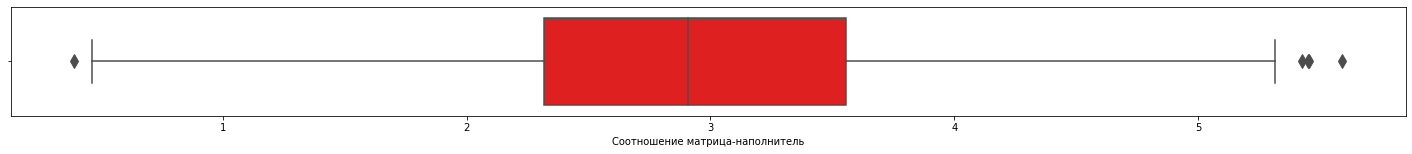

In [ ]:
#проверка на выбросы
plt.figure(figsize=(25,2))
sns.boxplot(dfg[names[3]],fliersize=10, color='red')

In [ ]:
#поиск отклонений через z-value
mm3 = dfg[names[3]].mean() #среднее значение 
st3 = statistics.stdev(dfg[names[3]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(dfg)):
  dfg.loc[i, 'Соотношение матрица-наполнитель'] = (dfg.loc[i, names[3]] - mm3) / st3 

print('max value = ', dfg['Соотношение матрица-наполнитель'].max(), 'min value = ', dfg['Соотношение матрица-наполнитель'].min())
print('Выбросы не обнаружены') #выбросы находятся в пределех от -3 до 3 

max value =  2.9169360450826036 min value =  -2.786179113655854
Выбросы не обнаружены


In [ ]:
names

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'nashivka_norm', 'plotnost_nashivki_norm'],
      dtype='object')

#Плотность, кг/м3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


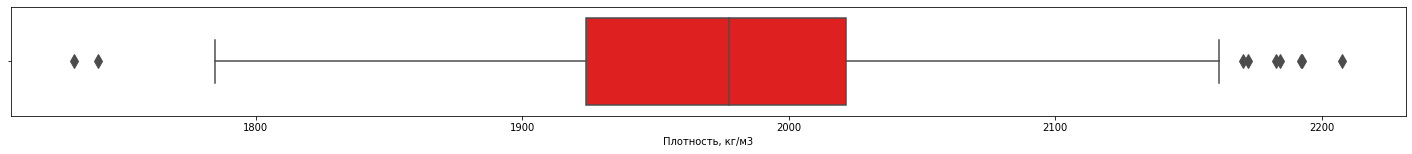

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(dfg[names[4]],fliersize=10, color='red')

In [ ]:
mm4 = dfg[names[4]].mean() #среднее значение 
st4 = statistics.stdev(dfg[names[4]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(dfg)):
  dfg.loc[i, 'Плотность, кг/м3'] = (dfg.loc[i, names[4]] - mm4) / st4 

print('max value = ', dfg['Плотность, кг/м3'].max(), 'min value = ', dfg['Плотность, кг/м3'].min())
print('Выбросы не существенны') #маленький диапазон

max value =  3.1443940843966884 min value =  -3.3002808651100044
Выбросы не существенны


#модуль упругости, ГПа'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


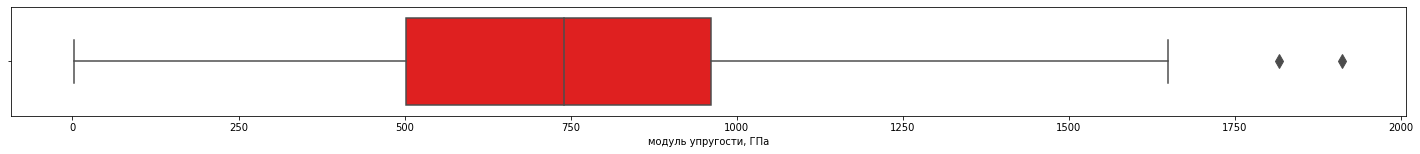

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(dfg[names[5]],fliersize=10, color='red')

In [ ]:
mm5 = dfg[names[5]].mean() #среднее значение 
st5 = statistics.stdev(dfg[names[5]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(dfg)):
  dfg.loc[i, 'модуль упругости, ГПа'] = (dfg.loc[i, names[5]] - mm5) / st5

print('max value = ', dfg['модуль упругости, ГПа'].max(), 'min value = ', dfg['модуль упругости, ГПа'].min())
print('Выбросы не существенны') #выбросов нет

max value =  3.54684287045615 min value =  -2.234174763920856
Выбросы не существенны


#Количество отвердителя, м.%

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


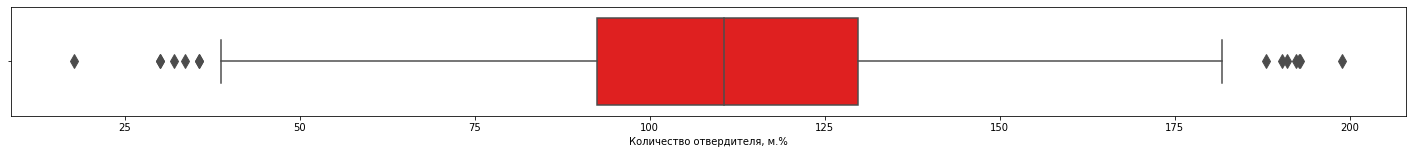

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(dfg[names[6]],fliersize=10, color='red')

In [ ]:
mm6 = dfg[names[6]].mean() #среднее значение 
st6 = statistics.stdev(dfg[names[6]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(dfg)):
  dfg.loc[i, 'Количество отвердителя, м.%'] = (dfg.loc[i, names[6]] - mm6) / st6

print('max value = ', dfg['Количество отвердителя, м.%'].max(), 'min value = ', dfg['Количество отвердителя, м.%'].min())
print('Выбросы не существенны') #выбросов нет

max value =  3.1171432786677955 min value =  -3.277435697359071
Выбросы не существенны


#Содержание эпоксидных групп,%_

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


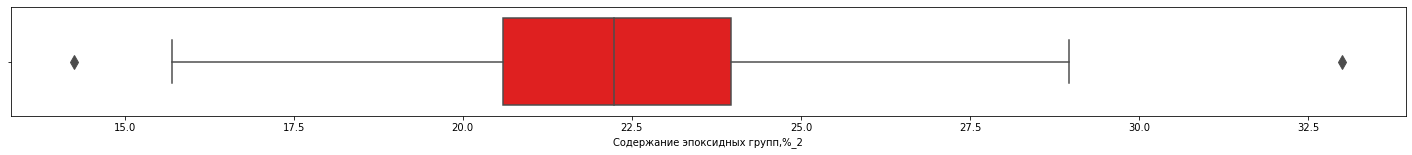

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(dfg[names[7]],fliersize=10, color='red')

In [ ]:
mm7 = dfg[names[7]].mean() #среднее значение 
st7 = statistics.stdev(dfg[names[7]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(dfg)):
  dfg.loc[i, 'Содержание эпоксидных групп,%_'] = (dfg.loc[i, names[7]] - mm7) / st7

print('max value = ', dfg['Содержание эпоксидных групп,%_'].max(), 'min value = ', dfg['Содержание эпоксидных групп,%_'].min())
print('Выбросы существенны') #выбросов нет

max value =  4.462493082147441 min value =  -3.3132538675527576
Выбросы существенны


In [ ]:
dfg7 = dfg[(dfg['Содержание эпоксидных групп,%_'] <= 3) & (dfg['Содержание эпоксидных групп,%_'] >= -3)]
dfg7.reset_index(inplace = True)
dfg7 = dfg7.copy()


In [ ]:
dfg7 = dfg7.iloc[:, 2:]

#Температура вспышки, С_2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


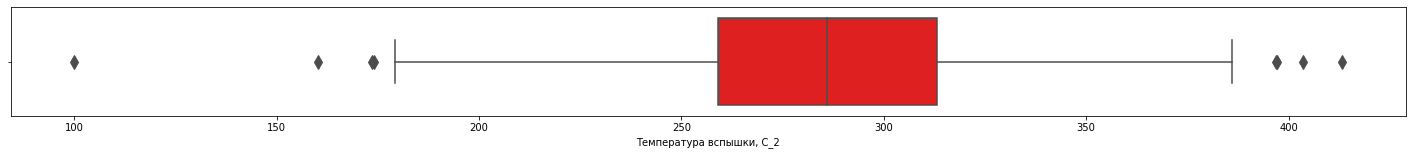

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(dfg7[names[8]],fliersize=10, color='red')

In [ ]:
mm8 = dfg7[names[8]].mean() #среднее значение 
st8 = statistics.stdev(dfg7[names[8]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(dfg7)):
  dfg7.loc[i, 'Температура вспышки, С_2'] = (dfg7.loc[i, names[8]] - mm8) / st8

print('max value = ', dfg7['Температура вспышки, С_2'].max(), 'min value = ', dfg7['Температура вспышки, С_2'].min())
print('Выбросы существенны') #выброс

max value =  3.1053430977693557 min value =  -4.53141442149409
Выбросы существенны


In [ ]:
dfg8 = dfg7[(dfg7['Температура вспышки, С_2'] <= 3) & (dfg7['Температура вспышки, С_2'] >= -3)]

dfg8.reset_index(inplace = True)
dfg8 = dfg8.copy()
dfg8 = dfg8.iloc[:, 1 :]
dfg8


# Поверхностная плотность, г/м2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


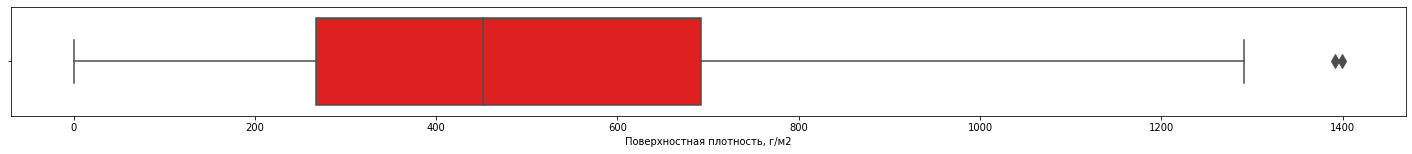

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(dfg8[names[9]],fliersize=10, color='red')

In [ ]:
mm9 = dfg8[names[9]].mean() #среднее значение 
st9 = statistics.stdev(dfg8[names[9]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(dfg8)):
  dfg8.loc[i, 'Поверхностная плотность, г/м2'] = (dfg8.loc[i, names[9]] - mm9) / st9

print('max value = ', dfg8['Поверхностная плотность, г/м2'].max(), 'min value = ', dfg8['Поверхностная плотность, г/м2'].min())
print('Выбросы  не существенны') #выброс нет

max value =  3.273664996478437 min value =  -1.7160704960710946
Выбросы  не существенны


#Модуль упругости при растяжении, ГПа

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


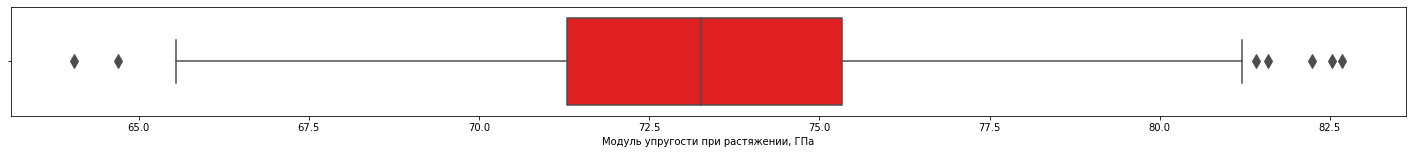

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(dfg8[names[10]],fliersize=10, color='red')

In [ ]:
mm10 = dfg8[names[10]].mean() #среднее значение 
st10 = statistics.stdev(dfg8[names[10]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(dfg8)):
  dfg8.loc[i, 'Модуль упругости при растяжении, ГПа'] = (dfg8.loc[i, names[10]] - mm10) / st10

print('max value = ', dfg8['Модуль упругости при растяжении, ГПа'].max(), 'min value = ', dfg8['Модуль упругости при растяжении, ГПа'].min())
print('Выбросы  не существенны') #выброс нет

max value =  3.0062483362835772 min value =  -2.9812922810172675
Выбросы  не существенны


#Прочность при растяжении, МПа

In [ ]:
names

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'nashivka_norm', 'plotnost_nashivki_norm'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


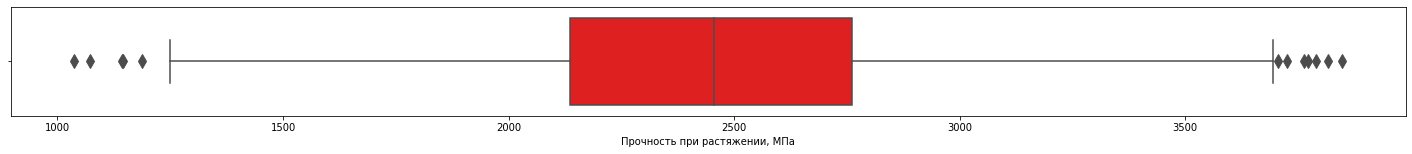

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(dfg8[names[11]],fliersize=10, color='red')

In [ ]:
mm11 = dfg8[names[11]].mean() #среднее значение 
st11 = statistics.stdev(dfg8[names[11]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(dfg8)):
  dfg8.loc[i, 'Прочность при растяжении, МПа'] = (dfg8.loc[i, names[11]] - mm11) / st11

print('max value = ', dfg8['Прочность при растяжении, МПа'].max(), 'min value = ', dfg8['Прочность при растяжении, МПа'].min())
print('Выбросы  не существенны') #выброс нет

max value =  2.8433377484244855 min value =  -2.9388400837203994
Выбросы  не существенны


#Потребление смолы, г/м2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


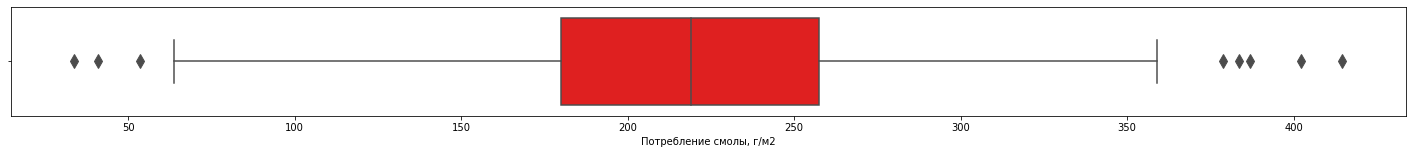

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(dfg8[names[12]],fliersize=10, color='red')

In [ ]:
mm12 = dfg8[names[12]].mean() #среднее значение 
st12 = statistics.stdev(dfg8[names[12]]) # cтандартное отклонение = корень кв их дисперсии

for i in range(0,len(dfg8)):
  dfg8.loc[i, 'Потребление смолы, г/м2'] = (dfg8.loc[i, names[12]] - mm12) / st12

print('max value = ', dfg8['Потребление смолы, г/м2'].max(), 'min value = ', dfg8['Потребление смолы, г/м2'].min())
print('Выбросы  не существенны') #выброс нет

max value =  3.287348835023294 min value =  -3.098691161502585
Выбросы  не существенны


In [ ]:
dfg8.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'nashivka_norm', 'plotnost_nashivki_norm',
       'Содержание эпоксидных групп,%_'],
      dtype='object')

In [ ]:

df = dfg8.iloc[:, :13]

df

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,-1.130977,0.230433,-1.177154,0.737522,-0.004557,-2.139066,23.750000,-0.030991,-0.969196,-1.070106,1.098478,0.023945
1,0.0,-0.740880,-0.822116,-1.177154,0.737522,-0.004557,0.648659,21.250000,0.344044,-0.969196,-1.070106,1.098478,0.023945
2,0.0,-0.740880,-0.012463,-0.174967,0.737522,0.038634,0.043828,22.267857,-0.030991,-0.969196,-1.070106,1.098478,0.023945
3,0.0,-0.740880,0.230433,-0.178708,0.331353,0.023493,0.043828,22.267857,-0.030991,-0.969196,-1.070106,1.098478,0.023945
4,0.0,-0.740880,1.040086,-0.396094,-0.887156,0.202154,0.043828,22.267857,-0.030991,-0.969196,-1.070106,1.098478,0.023945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,90.0,0.849302,-0.820515,-0.723080,-0.317328,0.522699,-0.833698,20.123249,0.947981,-0.972054,-0.076588,-0.161590,-1.569134
1007,90.0,1.430247,-0.275536,0.562478,1.009509,-0.894842,1.247913,19.599769,-0.772061,-0.467487,-0.131273,-0.216911,-1.691183
1008,90.0,-1.068111,0.848173,0.383329,-0.042690,-0.979315,-0.002981,23.957502,-0.913263,0.921718,0.451640,0.405225,0.302451
1009,90.0,-0.228605,0.089640,0.848962,1.235754,0.003736,1.086154,19.246945,-0.246378,0.569765,0.229330,-0.810592,-0.359664


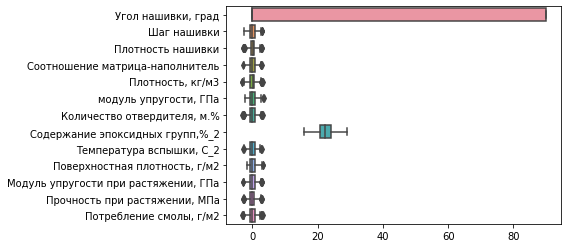

In [ ]:
# box_plot на маленьком поле
def box_plt3(df):
  sns.boxplot(data = df, orient="h")
  plt.show()
box_plt3(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1011 non-null   float64
 1   Шаг нашивки                           1011 non-null   float64
 2   Плотность нашивки                     1011 non-null   float64
 3   Соотношение матрица-наполнитель       1011 non-null   float64
 4   Плотность, кг/м3                      1011 non-null   float64
 5   модуль упругости, ГПа                 1011 non-null   float64
 6   Количество отвердителя, м.%           1011 non-null   float64
 7   Содержание эпоксидных групп,%_2       1011 non-null   float64
 8   Температура вспышки, С_2              1011 non-null   float64
 9   Поверхностная плотность, г/м2         1011 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1011 non-null   float64
 11  Прочность при рас

Нормализуем данные

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = preprocessing.MinMaxScaler()
columns = df.columns
df_z = scaler.fit_transform(np.array(df))
df_z = pd.DataFrame(df_z, columns=columns)
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1011 non-null   float64
 1   Шаг нашивки                           1011 non-null   float64
 2   Плотность нашивки                     1011 non-null   float64
 3   Соотношение матрица-наполнитель       1011 non-null   float64
 4   Плотность, кг/м3                      1011 non-null   float64
 5   модуль упругости, ГПа                 1011 non-null   float64
 6   Количество отвердителя, м.%           1011 non-null   float64
 7   Содержание эпоксидных групп,%_2       1011 non-null   float64
 8   Температура вспышки, С_2              1011 non-null   float64
 9   Поверхностная плотность, г/м2         1011 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1011 non-null   float64
 11  Прочность при рас

In [ ]:
#cкачаем датасет в отдельный файл
df_z.to_excel('df_z.xlsx')